# ML Algorithms

This notebook covers some of the details of the algorithms taught in Udacity's *Introduction to Machine Learning*. 

**Disclaimer:**
I don't cover the mathematics of the algorithms. I had that at uni, so where possible, I will add a link with the appropriate report or code. Maybe I will add some formulas later for the sake of completeness, but it's not very likely. 

# Table of Contents

- [Naive Bayes](#nb) 
- [Support Vector Machines](#svm)
- [Decision Trees](#dt)
- [Ada Bosst](#ada)
- [Regression](#regression)
- [Outlier Detection](#outlier)
- [Feature Section](#feature)

In [2]:
import sys
sys.path.append("tools/")
from prep_terrain_data import make_terrain_data
from class_vis import pretty_picture
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# prepare test data
features_train, labels_train, features_test, labels_test = make_terrain_data()

<a id="nb"></a>
## Naive Bayes

The main assumption we're making in Naive Bayes (and that's why it's called naive!) is that the probabilites of getting certain attribute values are **independent**. See details in my R implementation [here](http://rpubs.com/anablake/bayesian-learning) 

In [4]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.884


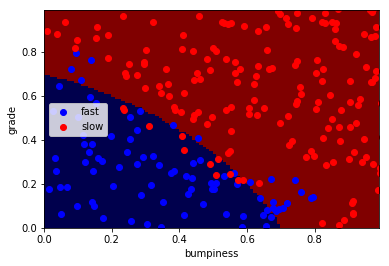

In [5]:
clf_nb = GaussianNB().fit(features_train, labels_train)
print("Accuracy: " + str(clf_nb.score(features_test, labels_test)))
pretty_picture(clf_nb, features_test, labels_test)

<a id="svm"></a>
## Support Vector Machines

## Kernel Trick
Kernel functions maps low-dimensional space to high-dimensional space, making inseparable input space separable. -> non-linear separation.

Parameters in SVM:
- kernel 
- C
- gamma (defines how far the influence of a single training point reaches, influences what points are taken into consideration when calculating the margin). Low gamma - even further points are taken into consideration
Kernel, C and gamma are all add up to overfitting. 

In [6]:
from sklearn.svm import SVC

### Big C

Accuracy: 0.932


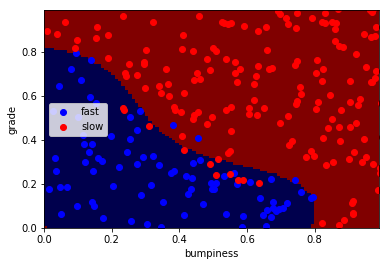

In [7]:
clf_svm_1 = SVC(kernel="rbf", C=10000).fit(features_train, labels_train)
print("Accuracy: " + str(clf_svm_1.score(features_test, labels_test)))
pretty_picture(clf_svm_1, features_test, labels_test)

### Small C

Accuracy: 0.92


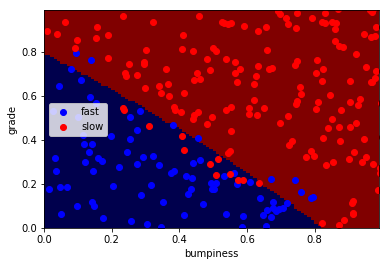

In [8]:
clf_svm_2 = SVC(kernel="rbf", C=1).fit(features_train, labels_train)
print("Accuracy: " + str(clf_svm_2.score(features_test, labels_test)))
pretty_picture(clf_svm_2, features_test, labels_test)

<a id="dt"></a>
## Decision Trees

See my C# [implementation from scratch](https://bitbucket.org/ana_makarevich/decisiontrees/src/master/).

Decision trees allow you to ask multiple linear questions. Entropy - measure of impurity in a bunch of examples. It's the opposite of the purity. Example, when subset is pure - when all examples belong to one class, so the entropy is 0.
When examples are evenly split between the classes, the entropy is 1. 

$$E = \sum_i -p_i \log_2 (p_i)$$

**Information gain = Entropy(parent) - [weighted average] of Entropy(children)**,

children - the nodes of the candidate split. 

Decision Tree maximizes information gain. 

Bias-Variance Trade-off

Biased algorithm - practically ignores the data. Another extrem - when the algorithm learns only what it has seen before (so generalizes very badly).

Cons:
- very prone to overfitting 

In [9]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.912


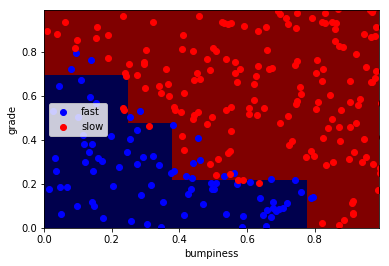

In [10]:
clf_dt = DecisionTreeClassifier(min_samples_split=40).fit(features_train, labels_train)
print("Accuracy: " + str(clf_dt.score(features_test, labels_test)))
pretty_picture(clf_dt, features_test, labels_test)

<a id="ada"></a>
## Choose Your Own: AdaBoost

The desciption is based on [this article](https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/). Really - read it, the article is superb!

AdaBoost shows best performance when used with weak learners that have accuracy just slightly higher than the baseline. Initially we assign each instance a weight: 

$$\text{w}(x_i) = \frac{1}{n}$$, 

$x_i$ - i-th observation, n - number of observations. 

Then for each learner in the set we will perform the following steps: 

**1. Train using the weighted samples, and the error rate is calculated:**

$$E = \frac{\sum_i (w(x_i) * Ec(x_i))} {\sum_i(w(x_i))}, Ec(x_i) \in \{0,1\}$$, 

where $Ec(x_i)$ is prediction error for i-th observation. It will be 1 if the prediction is wrong and 0 if it's correct. So basically we sum up weighted errors. 

**2. Calculate stage**

The stage is calculated as follows: 
$$S = \ln{(\frac{1-\text{E}}{E})}$$

**3. Update instances weights**

Then we can update the weights of our instances: 

$$w(x_i) = w(x_i) * e^{S*Ec(x_i)}$$

If the instance was predicted correctly, then we will have $Ec(x_i) =$ and $w(x_i) = w(x_i)*1$, so the weight will not change. While if the prediction was wrong, then the weight will grow by $e^S$. 

**Termination condition**

The algorithms stops when either we've exhausted all our classifiers or no accuracy improvement is possible with the training set. 

**Prediction**

In order to make a prediction using this ensemble, we have to use all the classifiers. We weight all the predictions from all classifiers with the corresponding stage values and then apply sign function to the result (i.e., if the result is positive, then predict 1, otherwise - predict 0).

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
clf_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), 
                                              algorithm='SAMME.R',
                                              n_estimators=95, 
                                              learning_rate=0.1, 
                                              random_state=42).fit(features_train, labels_train)
print("Accuracy: " + str(clf_adaboost.score(features_test, labels_test)))
preds = clf_adaboost.predict(features_test)

Accuracy: 0.936


In [13]:
MAX_ESTIMATORS = 30
accuracies = []
for i in range(1,MAX_ESTIMATORS+1):
    acc = (AdaBoostClassifier(n_estimators=i).
           fit(features_train, labels_train).
           score(features_test, labels_test))
    accuracies.append(acc)

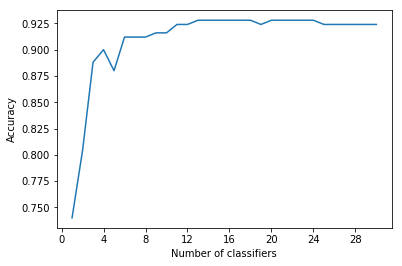

In [14]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.plot(range(1,MAX_ESTIMATORS+1), accuracies);
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Number of classifiers");
ax.set_ylabel("Accuracy");

<a id="regression"></a>
## Regression

I coevered linear regression in every detail [here](https://github.com/AnaMakarevich/DAND/blob/master/SelectedLectureNotes/LinearRegression.ipynb), so please refer to that notebook.

Algorithms that minimize SSE: 
- OLS (Ordinary Least Squares) 
- gradient descent

In [15]:
from sklearn import linear_model

### Bias-Variance Dillemma 

- High bias -> oversimplifiation, high error on training set  
- High variance -> overfitting, good fit on train data, bad fit to test data 

<a id="outlier"></a>
## Outliers Detection

Common algorithm: 

- train on the existing data
- calculate error and remove top 10% with the largest residual error
- train again

<a id="feature"></a>
## Feature Selection 

Possible reasons to remove feature: 
- too noisy 
- causes overfitting 
- highly correlated with other features 
- in the process of dimensionaltiy reduction 

There are several go-to methods of automatically selecting your features in sklearn. Many of them fall under the umbrella of univariate feature selection, which treats each feature independently and asks how much power it gives you in classifying or regressing.

There are two big univariate feature selection tools in sklearn: SelectPercentile and SelectKBest. The difference is pretty apparent by the names: SelectPercentile selects the X% of features that are most powerful (where X is a parameter) and SelectKBest selects the K features that are most powerful (where K is a parameter).

### Regularization 
Regularization is a method of automatically penalizing for adding more features. For examlple, it is used in lasso regression. The original objective function for regression is then tranformed as follows: 

$$E(X) = \sum_i^n (y_i - \sum_j^m x_i \beta_{j})^2 + \sum_j^m \lambda |\beta_j|$$

The last term is the penalty term. When we're using too many features, our SSE would be small, but with each feature we will have to add some lambda to the total error.

## PCA

Principal components are directions in the data that maximize variance (minimize information loss). Information loss = sum of all distances to the line.
Compared to regression, we're projecting (orthogonal projection) on the line, while in regression our projections are orthogonal to x-axis, but **not** orthogonal to the regression line. 

When to use PCA:

- latent features driving the data. 
- dimensionality reduction 
    - visualize high-dimensional data 
    - reduce noise 
    - make other algorithms work better (as pre-processing) 


## Cross-Validation
Simple k-folds. The idea is to split the dataset into k subsets, take k-1 of these and train on them, then use the remaining k-th subset as a test set. Repeat k times. 

In sklearn: **sklearn.model_selection.KFold**

Things to be aware of: Simple KFold splits the data sequentially (without shuffling). So in case the classes are stored sequentially (e.g. first 100 observations are class A, second 150 observations are of class B), then you should either shuffle the dataset before performing k-fold or pass it as a parameter. Or, if the classes are imbalanced - use **sklearn.model_selection.StratifiedKFold**

There is also a very useful function in sklearn called GridSearchCV taht allows to check multiple combinations of parameters that you can pass to an algorithm. For example, calling just this one function it's possible to compare SVM with different types of kernels with different values of C-parameter. 

Example: 
```
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)
clf.best_params_
```

## Evaluation Metrics

Accuracy: $$Acc = \frac{\text{number of correct predictions}}{\text{total number of observations}}$$

Recall:

$$\text{recall} = \frac{\text{TP}}{\text{TP+FN}}$$

In other words - what is the probability that we identify the true positive case among all real positive cases. It shows how many positives were correctly "recalled" 

Precision: 

$$\text{precision} = \frac{\text{TP}}{\text{TP+FP}}$$

In other words - what is the probability that the predicted class is really true positive. I.e. - what % of item predicted to be positive are actually positive?

F1 Score: 

$$\text{F1} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$